In [21]:
import os
import pandas as pd
import numpy as np
import warnings
from google.cloud import bigquery
from google.oauth2 import service_account
from matplotlib import pyplot as plt
%matplotlib inline
warnings.filterwarnings('ignore')

In [22]:
credentials = service_account.Credentials.from_service_account_file(os.getcwd()+'/final-project-team2-3547e307824d.json')
project_id = 'final-project-team2'
client = bigquery.Client(credentials= credentials,project=project_id)

In [23]:
query = ("SELECT * FROM movielens.customers")
query_job = client.query(
    query,# Location must match that of the dataset(s) referenced in the query.
    location="US",)  # API request - starts the query
customer = query_job.to_dataframe()

query = ("SELECT * FROM movielens.movies")
query_job = client.query(
    query,# Location must match that of the dataset(s) referenced in the query.
    location="US",)  # API request - starts the query
movies =  query_job.to_dataframe()

query = ("SELECT * FROM movielens.ratings")
query_job = client.query(
    query,# Location must match that of the dataset(s) referenced in the query.
    location="US",)  # API request - starts the query
ratings =  query_job.to_dataframe()


In [24]:
customer.info()
customer.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610 entries, 0 to 609
Data columns (total 4 columns):
user_id       610 non-null int64
first_name    610 non-null object
last_name     610 non-null object
email_id      610 non-null object
dtypes: int64(1), object(3)
memory usage: 19.1+ KB


,user_id,first_name,last_name,email_id
0,148,Bo,Lay,team2info7374@gmail.com
1,479,El,Mandry,team2info7374@gmail.com
2,507,Ly,Seedman,team2info7374@gmail.com
3,60,Adi,Jindrich,team2info7374@gmail.com
4,99,Amy,Macro,team2info7374@gmail.com


In [25]:
movies.info()
movies.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5039 entries, 0 to 5038
Data columns (total 23 columns):
movie_id                     5039 non-null int64
movie_title                  5039 non-null object
director_name                5039 non-null object
actor_1_name                 5037 non-null object
actor_2_name                 5031 non-null object
actor_3_name                 5020 non-null object
genres                       5039 non-null object
plot_keywords                4886 non-null object
num_critic_for_reviews       4989 non-null float64
duration                     5024 non-null float64
director_facebook_likes      4938 non-null float64
gross                        4158 non-null float64
num_voted_users              5039 non-null int64
cast_total_facebook_likes    5039 non-null int64
facenumber_in_poster         5026 non-null float64
num_user_for_reviews         5018 non-null float64
content_rating               4738 non-null object
budget                       4550 non-nu

,movie_id,movie_title,director_name,actor_1_name,actor_2_name,actor_3_name,genres,plot_keywords,num_critic_for_reviews,duration,...,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,544,Life,Daniel Espinosa,Adam Arkin,Brent Sexton,Damian Lewis,Crime|Drama|Mystery,cop|murder|partner|police|protective male,12.0,45.0,...,504,1.0,67.0,None,NaN,NaN,130.0,8.3,NaN,0
1,686,The Missing,Ron Howard,Jason Flemyng,James Nesbitt,Frances O'Connor,Crime|Drama|Mystery,france|journalist|limp|police detective|reporter,14.0,60.0,...,3537,0.0,28.0,None,NaN,NaN,773.0,8.1,NaN,0
2,834,Anger Management,Peter Segal,Barry Corbin,Noureen DeWulf,Brian Austin Green,Comedy|Romance,anger management|argument|irony|sarcasm|therapist,26.0,22.0,...,4115,1.0,54.0,None,NaN,NaN,701.0,6.7,16.00,0
3,963,Unforgotten,Andy Wilson,Bernard Hill,Gemma Jones,Nicola Walker,Crime|Drama,None,2.0,45.0,...,1816,2.0,9.0,None,NaN,NaN,171.0,7.9,NaN,0
4,995,A Touch of Frost,R. D. Wingfield,David Jason,Bruce Alexander,John Lyons,Crime|Drama|Mystery,cult tv|death|detective inspector|four word ti...,14.0,105.0,...,344,1.0,33.0,None,NaN,NaN,7.0,7.8,1.33,361


In [26]:
ratings.info()
ratings.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65482 entries, 0 to 65481
Data columns (total 3 columns):
user_id     65482 non-null int64
movie_id    65482 non-null int64
rating      65482 non-null float64
dtypes: float64(1), int64(2)
memory usage: 1.5 MB


,user_id,movie_id,rating
0,1,1219,2.0
1,1,2253,2.0
2,1,2338,2.0
3,1,2389,2.0
4,1,2617,2.0


In [27]:
# Users who gave movie ratings 
movie_ratings = pd.merge(movies, ratings, on='movie_id', how='inner')
movie_ratings.head()

,movie_id,movie_title,director_name,actor_1_name,actor_2_name,actor_3_name,genres,plot_keywords,num_critic_for_reviews,duration,...,num_user_for_reviews,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,user_id,rating
0,544,Life,Daniel Espinosa,Adam Arkin,Brent Sexton,Damian Lewis,Crime|Drama|Mystery,cop|murder|partner|police|protective male,12.0,45.0,...,67.0,None,NaN,NaN,130.0,8.3,NaN,0,414,2.0
1,544,Life,Daniel Espinosa,Adam Arkin,Brent Sexton,Damian Lewis,Crime|Drama|Mystery,cop|murder|partner|police|protective male,12.0,45.0,...,67.0,None,NaN,NaN,130.0,8.3,NaN,0,36,3.0
2,544,Life,Daniel Espinosa,Adam Arkin,Brent Sexton,Damian Lewis,Crime|Drama|Mystery,cop|murder|partner|police|protective male,12.0,45.0,...,67.0,None,NaN,NaN,130.0,8.3,NaN,0,217,3.0
3,544,Life,Daniel Espinosa,Adam Arkin,Brent Sexton,Damian Lewis,Crime|Drama|Mystery,cop|murder|partner|police|protective male,12.0,45.0,...,67.0,None,NaN,NaN,130.0,8.3,NaN,0,368,3.0
4,544,Life,Daniel Espinosa,Adam Arkin,Brent Sexton,Damian Lewis,Crime|Drama|Mystery,cop|murder|partner|police|protective male,12.0,45.0,...,67.0,None,NaN,NaN,130.0,8.3,NaN,0,541,3.0


###  Find out the average ratings for every movie

In [28]:
avg_ratings = movie_ratings.groupby(['movie_id','movie_title']).mean()
print(avg_ratings.info())
df = pd.DataFrame()
# df['movie_id'] = avg_ratings.index.levels[0]
# df['movie_title'] = avg_ratings.index.levels[1]
# df['avg_ratings'] = avg_ratings['rating']
df.head()
avg_ratings['rating'].head()
# avg_ratings[['movie_id','movie_title','rating']]

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3657 entries, (1, Avatar) to (5039, My Date with Drew)
Data columns (total 16 columns):
num_critic_for_reviews       3621 non-null float64
duration                     3648 non-null float64
director_facebook_likes      3581 non-null float64
gross                        3019 non-null float64
num_voted_users              3657 non-null float64
cast_total_facebook_likes    3657 non-null float64
facenumber_in_poster         3645 non-null float64
num_user_for_reviews         3640 non-null float64
budget                       3320 non-null float64
title_year                   3577 non-null float64
actor_2_facebook_likes       3646 non-null float64
imdb_score                   3657 non-null float64
aspect_ratio                 3433 non-null float64
movie_facebook_likes         3657 non-null float64
user_id                      3657 non-null float64
rating                       3657 non-null float64
dtypes: float64(16)
memory usage: 528.1+ KB
No

movie_id  movie_title                               
1         Avatar                                        3.920930
2         Pirates of the Caribbean: At World's End      3.431818
3         Spectre                                       3.259615
4         The Dark Knight Rises                         2.357143
5         Star Wars: Episode VII - The Force Awakens    3.071429
Name: rating, dtype: float64

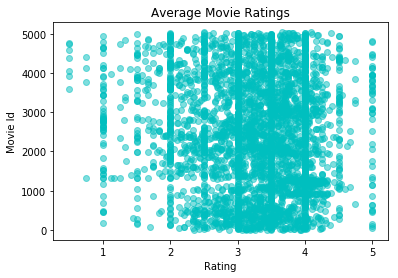

<Figure size 1800x1080 with 0 Axes>

In [29]:
#Average Movie Ratings Distribution
# plt.hist(avg_ratings['rating'],bins=10, color= 'c')
plt.scatter(avg_ratings['rating'], avg_ratings.index.levels[0], alpha=0.5, color = 'c')
plt.title('Average Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Movie Id')
plt.figure(figsize=(25,15))
plt.show()

In [30]:
#Find out how many time a movie is rated
count_users = movie_ratings.groupby(['user_id']).count()
print(count_users.info())
count_users.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 610 entries, 1 to 610
Data columns (total 24 columns):
movie_id                     610 non-null int64
movie_title                  610 non-null int64
director_name                610 non-null int64
actor_1_name                 610 non-null int64
actor_2_name                 610 non-null int64
actor_3_name                 610 non-null int64
genres                       610 non-null int64
plot_keywords                610 non-null int64
num_critic_for_reviews       610 non-null int64
duration                     610 non-null int64
director_facebook_likes      610 non-null int64
gross                        610 non-null int64
num_voted_users              610 non-null int64
cast_total_facebook_likes    610 non-null int64
facenumber_in_poster         610 non-null int64
num_user_for_reviews         610 non-null int64
content_rating               610 non-null int64
budget                       610 non-null int64
title_year                   61

,movie_id,movie_title,director_name,actor_1_name,actor_2_name,actor_3_name,genres,plot_keywords,num_critic_for_reviews,duration,...,facenumber_in_poster,num_user_for_reviews,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,rating
user_id,,,,,,,,,,,,,,,,,,,,,
1,231,231,231,231,230,229,231,223,231,231,...,231,231,222,216,223,230,231,218,231,231
2,4,4,4,4,4,4,4,3,4,4,...,4,4,4,3,3,4,4,4,4,4
3,27,27,27,27,27,27,27,27,27,27,...,27,27,26,26,26,27,27,27,27,27
4,216,216,216,216,216,216,216,210,214,216,...,216,215,210,203,210,216,216,203,216,216
5,44,44,44,44,44,44,44,44,44,44,...,44,44,44,42,42,44,44,44,44,44


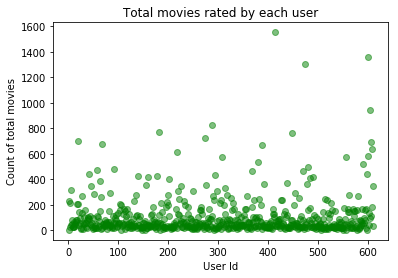

<Figure size 2160x1440 with 0 Axes>

In [31]:
plt.scatter(count_users.index,count_users['movie_id'],alpha=0.5, color = 'g')
plt.title('Total movies rated by each user')
plt.xlabel('User Id')
plt.ylabel('Count of total movies')
plt.figure(figsize=(30,20))
plt.show()

### Diffaren't Movie Genres

In [32]:
# Different types of genres
temp = pd.DataFrame()
t=[]
for index, row in movies.iterrows():
    genre = row['genres'].split('|')
    for g in genre:
        t.append(g)
temp['genres'] = t  
temp['genres'].unique()

array(['Crime', 'Drama', 'Mystery', 'Comedy', 'Romance', 'Thriller',
       'Family', 'Action', 'Game-Show', 'Reality-TV', 'Adventure',
       'Animation', 'Fantasy', 'History', 'Documentary', 'War', 'Horror',
       'Sci-Fi', 'Musical', 'Biography', 'Sport', 'Short', 'Music',
       'Western', 'News', 'Film-Noir'], dtype=object)

<BarContainer object of 5 artists>

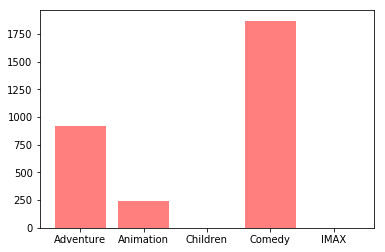

In [33]:
genre_movies=movies['genres'].str.contains('Adventure')
adventure = movies[genre_movies].shape[0]

genre_movies=movies['genres'].str.contains('Animation')
animation = movies[genre_movies].shape[0]

genre_movies=movies['genres'].str.contains('Children')
children = movies[genre_movies].shape[0]

genre_movies=movies['genres'].str.contains('Comedy')
comedy = movies[genre_movies].shape[0]

genre_movies=movies['genres'].str.contains('Fantasy')
fantasy = movies[genre_movies].shape[0]

genre_movies=movies['genres'].str.contains('Romance')
rom = movies[genre_movies].shape[0]

genre_movies=movies['genres'].str.contains('Drama')
drama = movies[genre_movies].shape[0]

genre_movies=movies['genres'].str.contains('Action')
action = movies[genre_movies].shape[0]

genre_movies=movies['genres'].str.contains('Crime')
crime = movies[genre_movies].shape[0]

genre_movies=movies['genres'].str.contains('Thriller')
thrill = movies[genre_movies].shape[0]

genre_movies=movies['genres'].str.contains('Horror')
hor = movies[genre_movies].shape[0]

genre_movies=movies['genres'].str.contains('Mystery')
myst = movies[genre_movies].shape[0]

genre_movies=movies['genres'].str.contains('Sci-Fi')
scf = movies[genre_movies].shape[0]

genre_movies=movies['genres'].str.contains('War')
war = movies[genre_movies].shape[0]

genre_movies=movies['genres'].str.contains('Musical')
music = movies[genre_movies].shape[0]

genre_movies=movies['genres'].str.contains('Documentary')
doc = movies[genre_movies].shape[0]

genre_movies=movies['genres'].str.contains('IMAX')
imax = movies[genre_movies].shape[0]

genre_movies=movies['genres'].str.contains('Western')
west = movies[genre_movies].shape[0]

genre_movies=movies['genres'].str.contains('Film-Noir')
flmn = movies[genre_movies].shape[0]

genre_movies=movies['genres'].str.contains('(no genres listed)')
na = movies[genre_movies].shape[0]

x1 = ['Adventure', 'Animation', 'Children', 'Comedy','IMAX']
y1 = [adventure, animation, children, comedy,imax] 
plt.bar(x1,y1,align='center', alpha=0.5,color='red')


<BarContainer object of 5 artists>

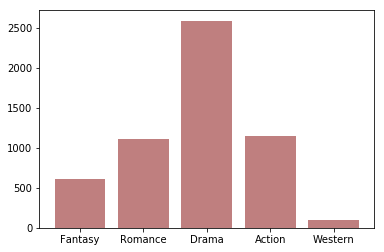

In [34]:
x2=  ['Fantasy','Romance', 'Drama', 'Action','Western']
y2 = [fantasy,rom,drama,action,west]
plt.bar(x2,y2,align='center', alpha=0.5, color = 'maroon')

<BarContainer object of 5 artists>

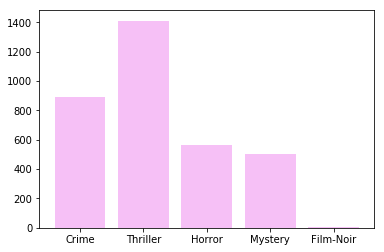

In [35]:
x3 = ['Crime', 'Thriller','Horror','Mystery','Film-Noir']
y3 = [crime,thrill,hor,myst,flmn]
plt.bar(x3,y3,align='center', alpha=0.5, color = 'violet')

<BarContainer object of 5 artists>

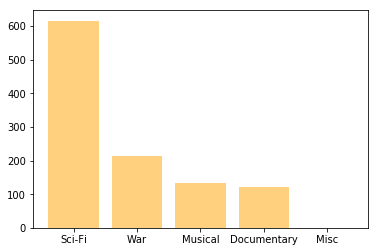

In [36]:
x4 = ['Sci-Fi', 'War', 'Musical', 'Documentary','Misc']
y4 = [scf,war,music,doc,na]
plt.bar(x4,y4,align='center', alpha=0.5, color = 'orange')

### Movies with high movie ratings

In [37]:
# Find out the average ratings for every movie
top_movies = movie_ratings.groupby(['movie_id','movie_title']).mean()
result = top_movies.sort_values(['rating'], ascending=False)
result[result['rating']>= 4.7]

,,num_critic_for_reviews,duration,director_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,user_id,rating
movie_id,movie_title,,,,,,,,,,,,,,,,
2969,Girl with a Pearl Earring,160.0,100.0,73.0,11634362.0,60171.0,34700.0,0.0,296.0,NaN,2003.0,14000.0,7.0,2.35,0.0,113.00,5.00
876,Semi-Pro,164.0,99.0,3.0,33472850.0,67005.0,10026.0,3.0,119.0,55000000.0,2008.0,509.0,5.8,2.35,0.0,493.00,5.00
3096,Precious,323.0,109.0,304.0,47536959.0,86956.0,3276.0,0.0,275.0,10000000.0,2009.0,906.0,7.3,1.85,12000.0,156.00,5.00
3939,Psycho Beach Party,51.0,85.0,0.0,265107.0,4617.0,2282.0,1.0,93.0,1500000.0,2000.0,774.0,6.3,1.85,614.0,546.00,5.00
1151,The Sweetest Thing,99.0,90.0,16.0,24430272.0,46158.0,132.0,3.0,403.0,43000000.0,2002.0,28.0,5.1,1.85,0.0,115.00,5.00
4495,The Blue Bird,7.0,83.0,9.0,NaN,1047.0,293.0,1.0,25.0,NaN,1940.0,62.0,6.5,1.37,548.0,474.00,5.00
3940,The Big Tease,33.0,86.0,8.0,185577.0,2133.0,2805.0,1.0,31.0,4000000.0,1999.0,638.0,6.3,1.85,182.0,546.00,5.00
3941,"Buen Dia, Ramon",26.0,120.0,45.0,100412.0,2112.0,824.0,0.0,7.0,4000000.0,2013.0,85.0,7.7,2.35,0.0,546.00,5.00
4788,Roadside,15.0,81.0,15.0,NaN,268.0,1151.0,0.0,6.0,NaN,2013.0,94.0,4.1,16.00,61.0,105.00,5.00


### Movies with low ratings

In [39]:
# Find out the average ratings for every movie
top_movies = movie_ratings.groupby(['movie_id','movie_title']).mean()
result = top_movies.sort_values(['rating'], ascending=False)
result[result['rating']< 2]

,,num_critic_for_reviews,duration,director_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,user_id,rating
movie_id,movie_title,,,,,,,,,,,,,,,,
1882,Cloverfield,459.0,85.0,198.0,80034302.0,296787.0,3958.0,0.0,2192.0,25000000.0,2008.0,1000.0,7.0,1.85,0.0,299.000000,1.954545
1862,Accidental Love,56.0,100.0,737.0,NaN,5006.0,19068.0,5.0,28.0,26000000.0,2015.0,980.0,4.0,1.85,0.0,254.222222,1.944444
2412,The O.C.,20.0,44.0,NaN,NaN,65785.0,2546.0,8.0,281.0,NaN,NaN,787.0,7.5,1.78,0.0,365.470588,1.941176
4477,The Lion of Judah,7.0,87.0,11.0,NaN,458.0,1730.0,0.0,3.0,15000000.0,2011.0,418.0,3.7,1.78,381.0,339.625000,1.937500
2392,The Mask,57.0,114.0,55.0,119938730.0,265818.0,2085.0,0.0,213.0,18000000.0,1994.0,424.0,6.9,1.85,0.0,330.250000,1.937500
1681,The Five-Year Engagement,232.0,131.0,89.0,28644770.0,78974.0,3479.0,2.0,141.0,30000000.0,2012.0,401.0,6.2,1.85,11000.0,400.285714,1.928571
1499,A Good Year,147.0,117.0,0.0,7458269.0,70698.0,3611.0,1.0,196.0,35000000.0,2006.0,883.0,6.9,2.35,9000.0,318.962963,1.925926
2404,My Big Fat Greek Wedding 2,156.0,94.0,52.0,59573085.0,13562.0,2259.0,10.0,103.0,18000000.0,2016.0,312.0,6.1,2.35,19000.0,372.500000,1.916667
4676,Kevin Hart: Laugh at My Pain,5.0,89.0,15.0,7705974.0,3543.0,548.0,1.0,8.0,NaN,2011.0,135.0,7.5,1.85,614.0,413.666667,1.916667
